In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from autots import AutoTS


In [3]:
train_targets = pd.read_parquet('./data/A/train_targets.parquet')
x_test_estimated = pd.read_parquet('./data/A/X_test_estimated.parquet')
x_train_estimated = pd.read_parquet('./data/A/X_train_estimated.parquet')
x_train_observed = pd.read_parquet('./data/A/X_train_observed.parquet')

68170


,date_forecast,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36


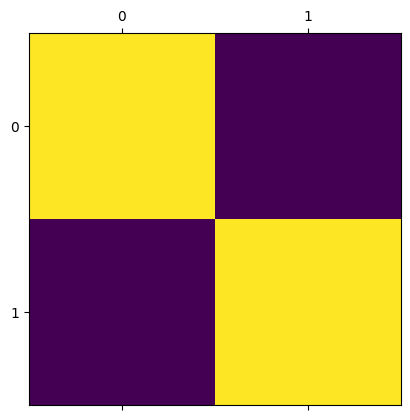

In [4]:
train_targets.rename(columns={'time': 'date_forecast'}, inplace=True)
print(train_targets.size)
plt.matshow(train_targets.corr())
train_targets.head()


135360


,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,...,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,...,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,...,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,...,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,...,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0


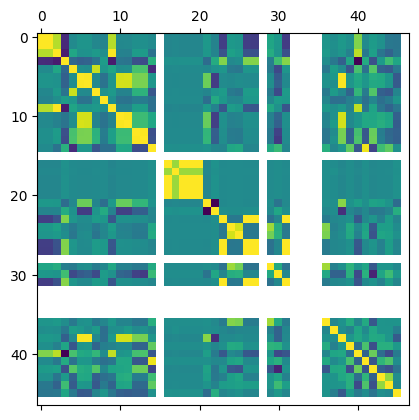

In [5]:
print(x_test_estimated.size)
plt.matshow(x_test_estimated.corr())
x_test_estimated.head()


826072


,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,...,340.799011,-38.466999,0.0,284.700012,100.0,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,...,345.451996,-38.955002,0.0,284.700012,100.0,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,...,350.153015,-39.310001,0.0,284.700012,100.0,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,...,354.886993,-39.528999,0.0,284.600006,100.0,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,...,359.638000,-39.609001,0.0,284.600006,100.0,6254.399902,0.6,-0.1,0.6,-0.0


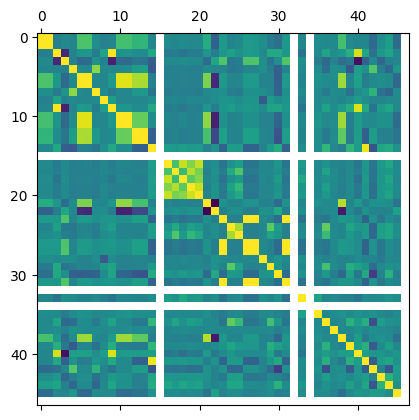

In [6]:
print(x_train_estimated.size)
plt.matshow(x_train_estimated.corr())
x_train_estimated.head()


5458774


,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,...,342.834015,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,...,346.294006,-3.650,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,...,349.768005,-3.998,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,...,353.251007,-4.247,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,...,356.742004,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0


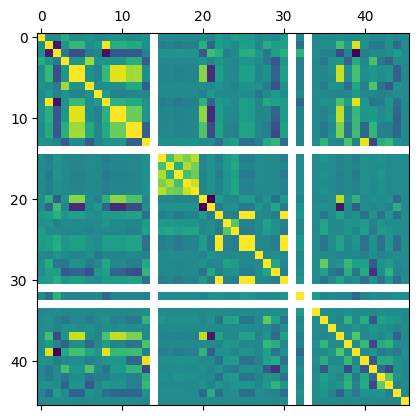

In [7]:
print(x_train_observed.size)
plt.matshow(x_train_observed.corr())
x_train_observed.head()

In [8]:
overlap = x_train_estimated['date_forecast'].isin(x_train_observed['date_forecast']).any()
if overlap:
    print("Overlap found")

x_train = pd.concat([x_train_estimated, x_train_observed], join='outer').drop('date_calc', axis=1)
x_train = x_train.merge(train_targets[['date_forecast', 'pv_measurement']], on='date_forecast', how='inner')
x_train.fillna(0, inplace=True)

x_train['date_forecast'] = pd.to_datetime(x_train['date_forecast'])
x_train.sort_values(by='date_forecast', inplace=True)

1600867


,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
4394,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.0,1744.900024,0.0,280.299988,0.0,...,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0,0.00
4395,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000,0.0,1703.599976,0.0,280.299988,0.0,...,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0,0.00
4396,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000,0.0,1668.099976,0.0,280.200012,0.0,...,-3.910,0.0,287.000000,100.0,20473.000000,3.2,-3.1,0.7,-0.0,0.00
4397,2019-06-03 01:00:00,8.2,1.218,1388.400024,0.000000,0.0,1388.400024,0.0,281.299988,0.0,...,-1.986,0.0,286.899994,100.0,2104.600098,2.8,-2.7,0.8,-0.0,0.00
4398,2019-06-03 02:00:00,8.8,1.219,1108.500000,6546.899902,9.8,1108.500000,0.0,282.299988,4.3,...,1.401,0.0,286.500000,100.0,2681.600098,2.7,-2.5,1.0,-0.0,19.36


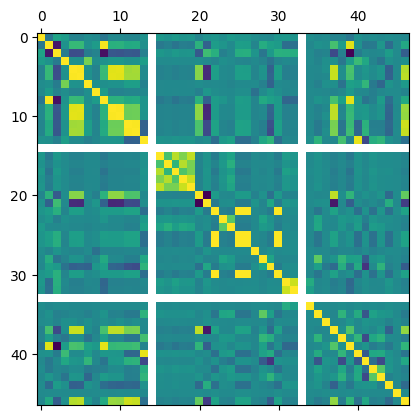

In [9]:
print(x_train.size)
plt.matshow(x_train.corr())
x_train.head()

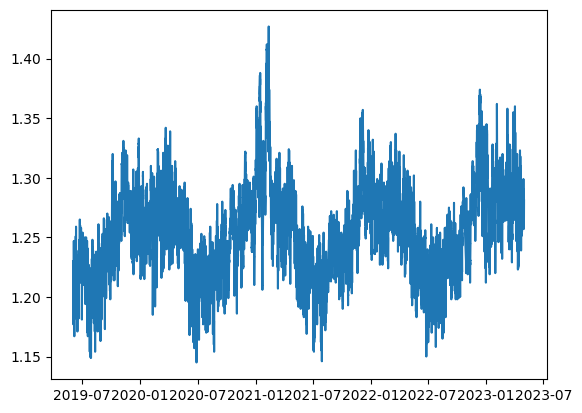

In [10]:
plt.plot(x_train['date_forecast'], x_train['air_density_2m:kgm3'])
plt.show()

In [11]:
stats = x_train.describe()
stats.loc['NaN'] = x_train.isna().sum()
stats

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
count,34061,34061.000000,34061.000000,34061.000000,3.406100e+04,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,...,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000
mean,2021-05-13 13:58:16.843897,6.322345,1.253279,2228.493408,5.526699e+05,153.522400,1533.308838,0.021109,275.971649,42.171734,...,-0.047865,0.055703,279.936676,74.234734,32579.109375,3.061046,0.655333,0.567538,0.000021,631.011165
min,2019-06-02 22:00:00,0.700000,1.145000,0.000000,0.000000e+00,0.000000,0.000000,-1.000000,250.899994,0.000000,...,-49.941002,0.000000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000,0.000000
25%,2020-05-22 17:00:00,4.200000,1.228000,227.899994,0.000000e+00,0.000000,435.399994,0.000000,271.299988,0.000000,...,-17.025000,0.000000,275.200012,53.099998,15583.599609,1.700000,-1.500000,-0.700000,0.000000,0.000000
50%,2021-05-12 12:00:00,5.800000,1.251000,1368.400024,1.537820e+04,0.000000,980.900024,0.000000,276.000000,0.000000,...,-0.051000,0.000000,279.500000,95.199997,36456.199219,2.700000,0.300000,0.600000,0.000000,6.160000
75%,2022-05-02 07:00:00,8.300000,1.277000,3113.300049,9.042897e+05,249.699997,1894.400024,0.000000,281.299988,71.199997,...,16.985001,0.100000,284.600006,100.000000,48313.601562,4.100000,2.600000,1.700000,0.000000,679.140000
max,2023-04-30 23:00:00,17.500000,1.427000,12328.500000,3.004693e+06,834.799988,11688.700195,1.000000,293.799988,336.700012,...,49.880001,1.400000,303.299988,100.000000,71349.898438,15.200000,12.200000,8.600000,0.100000,5733.420000
std,NaN,2.801960,0.037245,2547.902100,8.503473e+05,236.807220,1772.653687,0.195653,6.896890,62.958401,...,24.194777,0.109655,6.669673,34.467426,18114.937500,1.793841,2.896993,1.856094,0.001433,1166.206066
NaN,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


[[-1.80827753e-01  1.93452316e-01 -2.79392699e-02 ...  1.25840015e-01
  -1.76557039e-03 -2.67959898e-01]
 [ 1.49946559e-01 -2.57200117e-01  2.65343433e-02 ...  1.05364906e-02
  -1.05244419e-02 -3.69190449e-02]
 [-2.10817771e-01  4.13015727e-02  7.07970878e-02 ...  3.98329698e-02
  -5.26905166e-03  1.23726414e-01]
 ...
 [-1.26919590e-04 -4.01634000e-03  1.45080258e-05 ... -3.88504745e-05
   3.51238280e-06  3.06776516e-05]
 [-0.00000000e+00 -2.77555756e-17  1.11562249e-16 ... -2.77555756e-17
   4.51028104e-17  1.11022302e-16]
 [-0.00000000e+00  3.08780779e-16 -9.62125232e-17 ... -1.66533454e-16
   2.77555756e-17 -5.55111512e-17]]


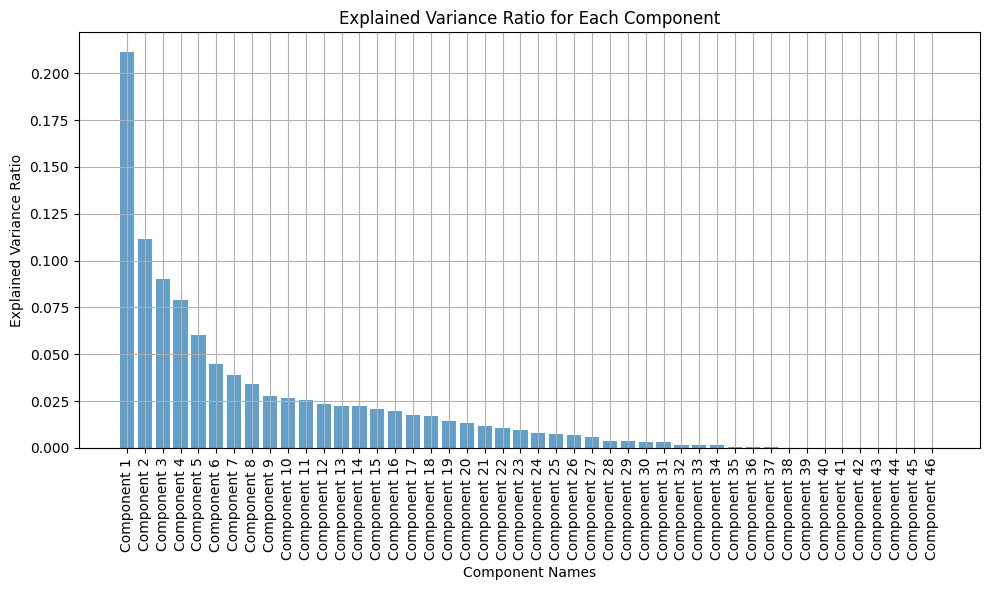

In [12]:
scaler = StandardScaler()
date_forecast = x_train['date_forecast']
x_train.drop(columns=['date_forecast'], inplace=True)
x_train_standardized = scaler.fit_transform(x_train)
comps = 15
pca = PCA()
pca.fit_transform(x_train_standardized)
explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_
print(principal_components)
# Create a bar plot for explained variance ratios
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')

# Set custom labels for the x-axis based on PCA component order
num_components = len(explained_variance_ratio)
variable_names = [f'Component {i+1}' for i in range(num_components)]

plt.xticks(range(1, num_components + 1), variable_names, rotation=90)  # Use rotation for better readability

plt.xlabel('Component Names')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Component')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
x_train['date_forecast'] = date_forecast
model = AutoTS(
    forecast_length=15,
    frequency='D',
    prediction_interval=0.95,
    ensemble=None,
    models_mode='deep',
    model_list = 'fast',# or ['ARIMA','ETS']
    max_generations=1,
    num_validations=3,
    no_negatives=True,
    n_jobs='12')

model = model.fit(x_train, date_col='date_forecast', value_col='pv_measurement', result_file="result.idk")

result_file must be a valid str with .csv or .pickle
Data frequency is: H, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1
Model Number: 2 with model AverageValueNaive in generation 0 of 1
Model Number: 3 with model AverageValueNaive in generation 0 of 1
Model Number: 4 with model DatepartRegression in generation 0 of 1
Model Number: 5 with model DatepartRegression in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Model Number: 6 with model DatepartRegression in generation 0 of 1
Model Number: 7 with model DatepartRegression in generation 0 of 1
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 1
Model Number: 9 with model ETS in generation 0 of 1
Model Number: 10 with model GLM in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 11 with model GLM in generation 0 of 1
Model Number: 12 with model GLS in generation 0 of 1
Model Number: 13 with model GLS in generation 0 of 1
Model Number: 14 with model LastValueNaive in generation 0 of 1
Model Number: 15 with model LastValueNaive in generation 0 of 1
Model Number: 16 with model LastValueNaive in generation 0 of 1
Model Number: 17 with model LastValueNaive in generation 0 of 1
Model Number: 18 with model SeasonalNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 19 with model SeasonalNaive in generation 0 of 1
Model Number: 20 with model SeasonalNaive in generation 0 of 1
Model Number: 21 with model VAR in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Model Number: 22 with model VAR in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Model Number: 23 with model VECM in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VECM') in model 23 in generation 0: VECM
Model Number: 24 with model VECM in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VECM') in model 24 in generation 0: VECM
Model Number: 25 with model WindowRegression in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill()

Model Number: 26 with model ConstantNaive in generation 0 of 1
Model Number: 27 with model DatepartRegression in generation 0 of 1
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-pack

Model Number: 29 with model DatepartRegression in generation 0 of 1
Model Number: 30 with model ETS in generation 0 of 1
Model Number: 31 with model VECM in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Model Number: 32 with model MultivariateMotif in generation 0 of 1
Model Number: 33 with model MultivariateMotif in generation 0 of 1
Model Number: 34 with model UnivariateMotif in generation 0 of 1
Model Number: 35 with model UnivariateMotif in generation 0 of 1
Model Number: 36 with model SectionalMotif in generation 0 of 1
Model Number: 37 with model SectionalMotif in generation 0 of 1
Model Number: 38 with model SeasonalNaive in generation 0 of 1
Model Number: 39 with model DatepartRegression in generation 0 of 1

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_m


Model Number: 40 with model NVAR in generation 0 of 1
Model Number: 41 with model Cassandra in generation 0 of 1
Model Number: 42 with model SeasonalityMotif in generation 0 of 1
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'nearest', 'transformations': {'0': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 42 in generation 0: SeasonalityMotif
Model Number: 43 with model ConstantNaive in generation 0 of 1
Model Number: 44 with model LastValueNaive in generation 0 of 1
Model Number: 45 with model AverageValueNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 46 with model GLS in generation 0 of 1
Model Number: 47 with model SeasonalNaive in generation 0 of 1
Model Number: 48 with model GLM in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in 

Model Number: 49 with model ETS in generation 0 of 1
Model Number: 50 with model VAR in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50 in generation 0: VAR
Model Number: 51 with model VECM in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51 in generation 0: VECM
Model Number: 52 with model WindowRegression in generation 0 of 1
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52 in generation 0: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 1
Model Number: 54 with model UnivariateMotif in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with

Model Number: 55 with model MultivariateMotif in generation 0 of 1
Model Number: 56 with model SectionalMotif in generation 0 of 1
Model Number: 57 with model NVAR in generation 0 of 1
Model Number: 58 with model MAR in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Template Eval Error: ValueError('Shape of passed values is (7, 1), indices imply (15, 1)') in model 58 in generation 0: MAR
Model Number: 59 with model RRVAR in generation 0 of 1
Model Number: 60 with model KalmanStateSpace in generation 0 of 1
Model Number: 61 with model MetricMotif in generation 0 of 1
Model Number: 62 with model Cassandra in generation 0 of 1
Model Number: 63 with model SeasonalityMotif in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:2104: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")


Model Number: 64 with model AverageValueNaive in generation 0 of 1
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 64 in generation 0: AverageValueNaive
Model Number: 65 with model UnivariateMotif in generation 0 of 1
Model Number: 66 with model WindowRegression in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 66 in generation 0: WindowRegression
Model Number: 67 with model UnivariateMotif in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 68 with model GLM in generation 0 of 1
Model Number: 69 with model KalmanStateSpace in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.54762e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fil

Model Number: 70 with model AverageValueNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


Model Number: 71 with model DatepartRegression in generation 0 of 1
Model Number: 72 with model VAR in generation 0 of 1

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)



Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model UnivariateMotif in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 74 with model DatepartRegression in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 74 in generation 0: DatepartRegression
Model Number: 75 with model GLM in generation 0 of 1
Model Number: 76 with model UnivariateMotif in generation 0 of 1
Model Number: 77 with model RRVAR in generation 0 of 1
Model Number: 78 with model LastValueNaive in generation 0 of 1
Model Number: 79 with model SeasonalNaive in generation 0 of 1
Model Number: 80 with model ConstantNaive in generation 0 of 1
Model Number: 81 with model SectionalMotif in generation 0 of 1
Model Number: 82 with model ConstantNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

Model Number: 83 with model MetricMotif in generation 0 of 1
Model Number: 84 with model ConstantNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 85 with model LastValueNaive in generation 0 of 1
Model Number: 86 with model VAR in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VAR') in model 86 in generation 0: VAR
Model Number: 87 with model MAR in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Template Eval Error: ValueError('Shape of passed values is (7, 1), indices imply (15, 1)') in model 87 in generation 0: MAR
Model Number: 88 with model LastValueNaive in generation 0 of 1
Model Number: 89 with model UnivariateMotif in generation 0 of 1
Model Number: 90 with model SectionalMotif in generation 0 of 1
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 90 in generation 0: SectionalMotif
Model Number: 91 with model MetricMotif in generation 0 of 1
Model Number: 92 with model MAR in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is d

Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 92 in generation 0: MAR
Model Number: 93 with model SectionalMotif in generation 0 of 1
Model Number: 94 with model Cassandra in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\thresholding.py:199: RuntimeWarning: divide by zero encountered in scalar divide
  mean_perc_decrease = (
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester

Model Number: 95 with model GLM in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and w

Model Number: 96 with model MAR in generation 0 of 1
Template Eval Error: ValueError('Shape of passed values is (14, 1), indices imply (15, 1)') in model 96 in generation 0: MAR
Model Number: 97 with model VAR in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VAR') in model 97 in generation 0: VAR
Model Number: 98 with model GLS in generation 0 of 1
Model Number: 99 with model RRVAR in generation 0 of 1
Model Number: 100 with model RRVAR in generation 0 of 1
Model Number: 101 with model GLM in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Model Number: 102 with model UnivariateMotif in generation 0 of 1
Model Number: 103 with model KalmanStateSpace in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 104 with model VECM in generation 0 of 1
Template Eval Error: ValueError('Only gave one variable to VECM') in model 104 in generation 0: VECM
Model Number: 105 with model GLS in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 106 with model LastValueNaive in generation 0 of 1
Model Number: 107 with model LastValueNaive in generation 0 of 1
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 107 in generation 0: LastValueNaive
Model Number: 108 with model MetricMotif in generation 0 of 1
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 108 in generation 0: MetricMotif
Model Number: 109 with model UnivariateMotif in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 109 in generation 0: UnivariateMotif
Model Number: 110 with model MAR in generation 0 of 1
Template Eval Error: ValueError('Shape of passed values is (14, 1), indices imply (15, 1)') in model 110 in generation 0: MAR
Model Number: 111 with model AverageValueNaive in generation 0 of 1
Model Number: 112 with model SeasonalityMotif in generation 0 of 1
Model Number: 113 with model SeasonalNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

Model Number: 114 with model GLM in generation 0 of 1
Model Number: 115 with model LastValueNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a

Model Number: 116 with model MetricMotif in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 117 with model GLM in generation 0 of 1
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 117 in generation 0: GLM
Model Number: 118 with model AverageValueNaive in generation 0 of 1
Model Number: 119 with model SeasonalNaive in generation 0 of 1
Model Number: 120 with model KalmanStateSpace in generation 0 of 1
Model Number: 121 with model UnivariateMotif in generation 0 of 1
Model Number: 122 with model MetricMotif in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
 

Model Number: 123 with model MAR in generation 0 of 1
Template Eval Error: ValueError('Shape of passed values is (7, 1), indices imply (15, 1)') in model 123 in generation 0: MAR
Model Number: 124 with model SectionalMotif in generation 0 of 1
Model Number: 125 with model Cassandra in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: Exception('Transformer BTCD failed on fit') in model 125 in generation 0: Cassandra
Model Number: 126 with model DatepartRegression in generation 0 of 1
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 126 in generation 0: DatepartRegression
Model Number: 127 with model LastValueNaive in generation 0 of 1
Model Number: 128 with model NVAR in generation 0 of 1
Model Number: 129 with model Cassandra in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: ValueError('prediction_interval method only handled by AnomalyDetector class.') in model 129 in generation 0: Cassandra
Model Number: 130 with model RRVAR in generation 0 of 1
Model Number: 131 with model UnivariateMotif in generation 0 of 1
Model Number: 132 with model SectionalMotif in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.54762e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fi

Model Number: 133 with model KalmanStateSpace in generation 0 of 1
Model Number: 134 with model SectionalMotif in generation 0 of 1
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'akima', 'transformations': {'0': 'AlignLastValue', '1': 'AlignLastValue', '2': 'MaxAbsScaler'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9, 'first_value_only': False}, '2': {}}}. fail_on_forecast_nan=True") in model 134 in generation 0: SectionalMotif
Model Number: 135 with model ConstantNaive in generation 0 of 1
Model Number: 136 with model LastValueNaive in generation 0 of 1
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 136 in generation 0: LastValueNaive
Model Number: 137 with model GLS in generation 0 of 1
Model Number: 138 with model VECM in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

Template Eval Error: ValueError('Only gave one variable to VECM') in model 138 in generation 0: VECM
Model Number: 139 with model LastValueNaive in generation 0 of 1
Model Number: 140 with model LastValueNaive in generation 0 of 1
Model Number: 141 with model Cassandra in generation 0 of 1
Template Eval Error: ValueError('transformed df has NaN filled series') in model 141 in generation 0: Cassandra
Model Number: 142 with model UnivariateMotif in generation 0 of 1
Model Number: 143 with model NVAR in generation 0 of 1
Model Number: 144 with model LastValueNaive in generation 0 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a

Model Number: 145 with model MetricMotif in generation 0 of 1
Model Number: 146 with model ConstantNaive in generation 0 of 1
Model Number: 147 with model MetricMotif in generation 0 of 1
New Generation: 1 of 1
Model Number: 148 with model SectionalMotif in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated an

Model Number: 149 with model SectionalMotif in generation 1 of 1
Model Number: 150 with model MetricMotif in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3

Model Number: 151 with model MetricMotif in generation 1 of 1
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 151 in generation 1: MetricMotif
Model Number: 152 with model MetricMotif in generation 1 of 1
Model Number: 153 with model GLM in generation 1 of 1
Model Number: 154 with model GLM in generation 1 of 1
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 154 in generation 1: GLM
Model Number: 155 with model GLM in generation 1 of 1
Model Number: 156 with model UnivariateMotif in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default valu

Model Number: 157 with model UnivariateMotif in generation 1 of 1
Model Number: 158 with model UnivariateMotif in generation 1 of 1
Model Number: 159 with model AverageValueNaive in generation 1 of 1
Model Number: 160 with model AverageValueNaive in generation 1 of 1
Model Number: 161 with model AverageValueNaive in generation 1 of 1
Model Number: 162 with model MetricMotif in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a futur

Model Number: 163 with model MetricMotif in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 164 with model MetricMotif in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 165 with model LastValueNaive in generation 1 of 1
Model Number: 166 with model LastValueNaive in generation 1 of 1
Model Number: 167 with model LastValueNaive in generation 1 of 1
Model Number: 168 with model SeasonalityMotif in generation 1 of 1
Model Number: 169 with model SeasonalityMotif in generation 1 of 1
Model Number: 170 with model SeasonalityMotif in generation 1 of 1
Model Number: 171 with model DatepartRegression in generation 1 of 1
Model Number: 172 with model DatepartRegression in generation 1 of 1
Model Number: 173 with model DatepartRegression in generation 1 of 1
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 173 in generation 1: DatepartRegression
Model Number: 174 with model RRVAR in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 175 with model RRVAR in generation 1 of 1
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 175 in generation 1: RRVAR
Model Number: 176 with model RRVAR in generation 1 of 1
Model Number: 177 with model ETS in generation 1 of 1
Model Number: 178 with model ETS in generation 1 of 1
Model Number: 179 with model ETS in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Model Number: 180 with model RRVAR in generation 1 of 1
Model Number: 181 with model RRVAR in generation 1 of 1
Model Number: 182 with model RRVAR in generation 1 of 1
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 182 in generation 1: RRVAR
Model Number: 183 with model RRVAR in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Template Eval Error: Exception('Transformer BTCD failed on fit') in model 183 in generation 1: RRVAR
Model Number: 184 with model RRVAR in generation 1 of 1
Model Number: 185 with model UnivariateMotif in generation 1 of 1
Model Number: 186 with model UnivariateMotif in generation 1 of 1
Model Number: 187 with model UnivariateMotif in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'm

Model Number: 188 with model KalmanStateSpace in generation 1 of 1
Model Number: 189 with model KalmanStateSpace in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 190 with model KalmanStateSpace in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 191 with model KalmanStateSpace in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 192 with model KalmanStateSpace in generation 1 of 1
Model Number: 193 with model KalmanStateSpace in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 194 with model Cassandra in generation 1 of 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\fast_kalman.py:858: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\fast_kalman.py:858: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\fast_kalman.py:868: RuntimeWarning: overflow encountered in multiply
  return 

In [ ]:
print(model)

In [ ]:
model.results()[['Model', 'smape', 'mae', 'rmse', 'made', 'mage', 'mle']]